In [6]:
%run visualisation.ipynb
%run read_NBAPlayers_graph.ipynb
%run GirvanNewmanAlgorithms.ipynb

In [4]:
g = igraph.Graph()
readVertices("/home/irek/community-detection/Scrapers/BasketballReferenceScraper/data/Players.csv",g,True)
readEdges("/home/irek/community-detection/Scrapers/BasketballReferenceScraper/data/Edges.csv",g, True)

In [225]:
AllStars1920 = [4524, 4418, 4778, 112, 3876, 1223, 2591, 3892, 614, 2889, 25, 4147, 3726, 1717, 1085, 2065, 2513, 955, 3311, 2542, 2938, 2004, 2177, 1517, 401, 2009, 3201, 266, 1620, 4393, 4396, 3719, 921, 1149, 1475, 4227, 44, 4278, 3159]
Overlap = [[-1] for i in range(0, 10*len(AllStars1920))]

In [96]:
for player in AllStars1920:
    print(g.vs[player].attributes())

37
39


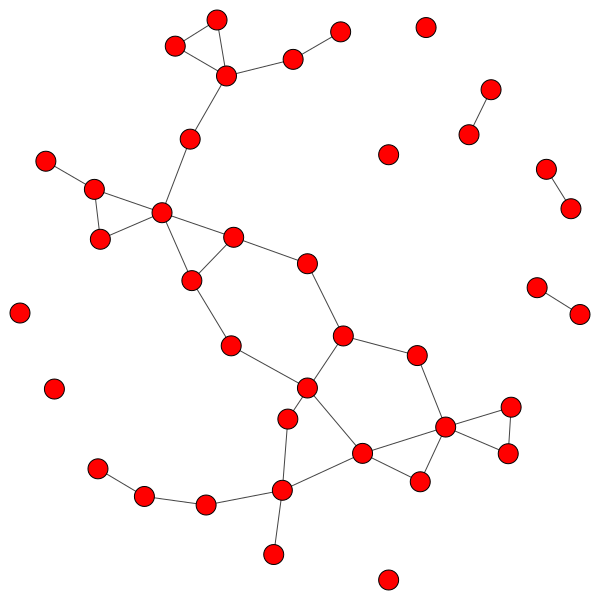

In [226]:
AllStars1920Graph = g.subgraph(AllStars1920)
print(AllStars1920Graph.ecount())
print(AllStars1920Graph.vcount())
for vertex in AllStars1920Graph.vs:
    vertex["communities"] = [0]
plot(AllStars1920Graph, "AllStars1920.svg")

In [151]:
for player in AllStars1920Graph.vs:
    print(player)
for edge in AllStars1920Graph.es:
    print(edge.tuple)
    print(edge.attributes())
    print(' ')

igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 0, {'name': 'Bam Adebayo'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 1, {'name': 'LaMarcus Aldridge'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 2, {'name': 'Giannis Antetokounmpo'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 3, {'name': 'Bradley Beal'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 4, {'name': 'Devin Booker'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 5, {'name': 'Jimmy Butler'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 6, {'name': 'Stephen Curry'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 7, {'name': 'Anthony Davis'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 8, {'name': 'Luka Doncic'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 9, {'name': 'Kevin Durant'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 10, {'name': 'Joel Embiid'})
igraph.Vertex(<igraph.Graph object at 0x7f337721f650>, 11, {'n

In [270]:
edge_betweenness = AllStars1920Graph.edge_betweenness(directed=False, cutoff=None, weights=None)
max_eb = max(edge_betweenness)
print(max_eb)
vertex_betweenness = AllStars1920Graph.betweenness(vertices=None, directed=False, cutoff=None, weights=None, nobigint=True)
max_vb = max(vertex_betweenness)
print(max_vb)

ValueError: max() arg is an empty sequence

In [269]:
edgesToDelete = [AllStars1920Graph.es[idx].tuple for idx, eb in enumerate(edge_betweenness) if (eb == max_eb and eb == max_eb)]
print(edgesToDelete)
result.append(edgesToDelete)
print(result)
AllStars1920Graph.delete_edges(edgesToDelete)

[(1, 20), (2, 22), (8, 24), (9, 14), (9, 37), (10, 30), (12, 23), (14, 37), (15, 27), (17, 35), (19, 21), (19, 29), (21, 29), (31, 36), (7, 40), (5, 41), (33, 42), (10, 43), (30, 43)]
[37, 17, 35, 27, 5, 41, [(14, 26)], [(11, 19)], [(6, 42)], [(0, 43), (0, 44)], [(1, 19), (16, 17), (16, 31)], [(5, 33), (25, 34), (11, 39), (25, 39), (15, 40)], [(6, 9)], [(13, 26), (25, 28), (28, 39), (13, 44)], [(1, 20), (2, 22), (8, 24), (9, 14), (9, 37), (10, 30), (12, 23), (14, 37), (15, 27), (17, 35), (19, 21), (19, 29), (21, 29), (31, 36), (7, 40), (5, 41), (33, 42), (10, 43), (30, 43)]]


In [249]:
vertexToCopy = vertex_betweenness.index(max_vb);
print(vertexToCopy)
incident = AllStars1920Graph.incident(vertexToCopy, mode=ALL)
print(incident)
AllStars1920Graph.add_vertices(1)
Overlap[AllStars1920Graph.vcount()-1].append(vertexToCopy)
print(Overlap)

41
[29, 30, 31]
[[-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1, 37], [-1, 17], [-1, 35], [-1, 27], [-1, 5], [-1, 41], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], 

In [250]:
sum = 0
for edge in incident:
    print(AllStars1920Graph.es[edge]['weight'])
    sum += AllStars1920Graph.es[edge]['weight']

average = sum/len(incident)
print(sum)
print(average)
edges_to_delete = []
new_vertex_counter = AllStars1920Graph.vcount()-1
for edge in incident:
    weight = AllStars1920Graph.es[edge]['weight']
    if(weight<average):
        edges_to_delete.append(edge)
        source = AllStars1920Graph.es[edge].source
        target = AllStars1920Graph.es[edge].target
        print([source, target])
        if(target == vertexToCopy):
            print([(source, new_vertex_counter)])
            AllStars1920Graph.add_edges([(source, new_vertex_counter)])
            AllStars1920Graph.es[AllStars1920Graph.ecount()-1]["weight"]=weight
        else:
            print([(new_vertex_counter, target)])
            AllStars1920Graph.add_edges([(new_vertex_counter, target)])
            AllStars1920Graph.es[AllStars1920Graph.ecount()-1]["weight"]=weight

3
4
3
10
3.3333333333333335
[0, 41]
[(0, 44)]
[13, 41]
[(13, 44)]


In [251]:
AllStars1920Graph.delete_edges(edges_to_delete)
result.append(vertexToCopy)
incident2 = AllStars1920Graph.incident(vertexToCopy, mode=ALL)
print(incident2)
print(result)

[29]
[37, 17, 35, 27, 5, 41]


In [213]:
#print(result)
for x in reversed(result):
    #try:
        length = len(x)
        print(length)
        for edge in x:
            print(edge)
            resultGraph.add_edges([edge])
            print("ABCD")
        break
    #except:
        #print("STOP")

19
(1, 20)
ABCD
(2, 22)
ABCD
(8, 24)
ABCD
(9, 14)
ABCD
(9, 37)
ABCD
(10, 30)
ABCD
(12, 23)
ABCD
(14, 37)
ABCD
(15, 27)
ABCD
(17, 35)
ABCD
(19, 21)
ABCD
(19, 29)
ABCD
(21, 29)
ABCD
(31, 36)
ABCD
(7, 40)
ABCD
(5, 41)
ABCD
(33, 42)
ABCD
(10, 43)
ABCD
(30, 43)
ABCD


In [214]:
#resultGraph = AllStars1920Graph.copy()
#resultGraph.delete_edges(resultGraph.es)
print(resultGraph.ecount())
print(resultGraph.vcount())

19
45


In [224]:
print(resultGraph.components()[1])
    

[1, 20]


In [231]:
result = [37]

In [205]:
def CONGARandom(g,n):
    iteration=0
    new_vertex_counter = g.vcount()
    table = [-1]*100*g.vcount()
    while(iteration<n and g.ecount() > 0):
        print(' ')
        print(iteration)
        edge_betweenness = g.edge_betweenness(directed=False, cutoff=None, weights=None)
        max_eb = max(edge_betweenness)
        print(max_eb)
        vertex_betweenness = g.betweenness(vertices=None, directed=False, cutoff=None, weights=None, nobigint=True)
        max_vb = max(vertex_betweenness)
        print(max_vb)
        if(max_eb > max_vb):
            edgesToDelete = [g.es[idx].tuple for idx, eb in enumerate(edge_betweenness) if (eb <= max_eb+0.1 and eb >= max_eb-0.1)]
            #print(edgesToDelete)
            g.delete_edges(edgesToDelete)
        else:
            vertexToCopy = vertex_betweenness.index(max_vb);
            #print(vertexToCopy)
            incident = g.incident(vertexToCopy, mode=ALL)
            #print(len(incident))
            g.add_vertices(str(new_vertex_counter))
            table[vertexToCopy] = new_vertex_counter
            delete_edge_iterator=0
            length = len(incident)/2
            #print(incident)
            edges_to_delete = [];
            while(delete_edge_iterator < length):
                #g.delete_edges(incident[delete_edge_iterator])
                source = g.es[incident[delete_edge_iterator]].source
                target = g.es[incident[delete_edge_iterator]].target
                #print([source, target])
                if(target == vertexToCopy):
                    #print([(source, new_vertex_counter)])
                    g.add_edges([(source, new_vertex_counter)])
                else:
                    #print([(new_vertex_counter, target)])
                    g.add_edges([(new_vertex_counter, target)])
                edges_to_delete.append(incident[delete_edge_iterator])
                delete_edge_iterator+=1
            new_vertex_counter+=1
            #print(edges_to_delete)
            g.delete_edges(edges_to_delete)
            incident2 = g.incident(vertexToCopy, mode=ALL)
            #print(len(incident2))
            #print(incident2)
        iteration+=1
        #print(table)
        print(g.ecount())
        #print(g.vcount())
    return table

In [ ]:
result = CONGARandom(g,100000)
print(result)

 
0
224439.8748642617
2096001.8238288027
186593
 
1
245682.1948334161
1848746.2563573404
186593
 
2
642511.9882281591
987357.0315043887
186593
 
3
689586.8935395803
983109.8361935107
186593
 
4
515325.68068051315
817352.200794417
186593
 
5
482641.2720531233
646021.2655176204
186593
 
6
504070.18400610785
645088.7697467079
186593
 
7
480877.71535963414
548253.3935588606
186593
 
8
521822.6619151875
590526.8292200553
186593
 
9
447276.76087685005
485629.0562714001
186593
 
10
454332.439614318
464801.04746450466
186593
 
11
399533.59658433625
483523.4558163474
186593
 
12
408696.774777576
416577.8073064368
186593
 
13
422313.8220081042
449332.8936682041
186593
 
14
352019.92184972245
444481.0128091345
186593
 
15
372070.07010761753
379955.77146905195
186593
 
16
329878.4981096229
382985.36602598586
186593
 
17
335870.09015367174
342811.49724009144
186593
 
18
350045.9553159936
353189.7932131038
186593
 
19
265603.7614858613
364483.63298236235
186593
 
20
335123.66532546165
338509.8088463

186592
 
168
64163.72726200372
81247.48810752483
186592
 
169
65543.19001319085
80990.44805666707
186592
 
170
66462.75189720163
81244.59807931627
186592
 
171
68518.77248115867
81658.59670476506
186592
 
172
68279.0051767406
84235.23286596636
186592
 
173
66038.49159314447
81951.7888143137
186592
 
174
66202.86451811984
84170.77631646467
186592
 
175
67416.29998683608
82150.84198797873
186592
 
176
67604.02865804348
79742.20085101665
186592
 
177
67944.39554964418
79721.56263087221
186592
 
178
68412.0268771388
81755.79326275057
186592
 
179
69273.71986811931
82170.74909056247
186592
 
180
73859.26331581977
81135.09007164974
186592
 
181
74142.02650458057
81373.92665120488
186592
 
182
74548.64664780222
80648.14009827728
186592
 
183
74686.94280454084
80601.90683987948
186592
 
184
74859.90492466172
80169.61716535805
186592
 
185
75191.32186245285
80652.40380873976
186592
 
186
75798.66839740262
81519.1655306956
186592
 
187
75938.0997799553
82445.81555577744
186592
 
188
76470.371595

59077.965560276905
62000.63392590701
186591
 
336
59161.7360278863
61698.117040068435
186591
 
337
59333.93332920852
66155.88324048361
186591
 
338
59494.89382842577
61809.49303726148
186591
 
339
59786.32680909388
61245.868356052255
186591
 
340
59838.892328693706
61468.39571560541
186591
 
341
59845.376746207585
60985.71354126638
186591
 
342
59898.298184223255
60804.58230943969
186591
 
343
60011.511973404595
60979.6825968897
186591
 
344
60153.63290279883
60906.82909907958
186591
 
345
60227.90296653261
60476.60013478222
186591
 
346
60421.43807239391
60629.3132211439
186591
 
347
57435.7993169571
60737.25293450642
186591
 
348
57491.32029248512
60334.119864865905
186591
 
349
57602.709005504665
60289.894742893826
186591
 
350
57720.776424384814
60397.18558661672
186591
 
351
57911.13138249937
59784.96790466161
186591
 
352
57973.92138378083
59533.16479371219
186591
 
353
58089.739257804875
59421.654627439566
186591
 
354
52827.2514746813
65041.594857266435
186591
 
355
52913.15389

In [101]:
def GetSubgraph(g, v, how_many):
    result = [v]
    counter = 0
    while(counter < how_many):
        edges = g.incident(v, mode=IN)
        for edge in edges:
            if(g.es[edge].source not in result):
                result.append(g.es[edge].source)
            if(g.es[edge].target not in result):
                result.append(g.es[edge].target)
            counter+=1
    print(result)
    return g.subgraph(result)

In [206]:
CurryGraph = GetSubgraph(g,921, 211)

[921, 28, 78, 136, 166, 202, 213, 217, 230, 263, 289, 291, 292, 298, 312, 331, 359, 383, 419, 431, 507, 534, 591, 664, 697, 703, 746, 758, 837, 863, 877, 1012, 1039, 1102, 1149, 1217, 1252, 1263, 1411, 1472, 1507, 1588, 1899, 1977, 1995, 2019, 2048, 2086, 2089, 2096, 2192, 2264, 2421, 2443, 2472, 2492, 2493, 2544, 2551, 2576, 2637, 2691, 2744, 2760, 2798, 2810, 2823, 2981, 3008, 3026, 3096, 3151, 3217, 3258, 3276, 3294, 3414, 3482, 3498, 3500, 3629, 3637, 3713, 3719, 3934, 3963, 4027, 4028, 4208, 4224, 4236, 4258, 4270, 4303, 4323, 4327, 4360, 4479, 4498, 4525, 4571, 4655, 4742, 4743, 4746, 4773]


In [123]:
print(CurryGraph.ecount())
print(CurryGraph.vcount())
#print(CurryGraph.es[5].tuple)

1799
106
